In [108]:
import numpy as np
from plyfile import PlyData
import os
import matplotlib.pyplot as plt

In [104]:
color_labels = {'floor': [105, 169, 219, 255], 'chair': [35, 45, 130, 255], 'sofa': [100, 35, 117, 255], 
                'table': [84, 84, 84, 255], 'clutter': [255, 255, 255, 255]}
modes = ['user_dynamic', 'user_static']
num_user = 5

In [91]:
def computePR(file, label):
    # load file
    plydata = PlyData.read(file)
    
    # compute tp, fn, fp
    vcolor = []
    vtx = plydata.elements[0].data

    tp, fn = 0, 0
    for i in range(len(vtx)):
        color = [vtx[i][-4], vtx[i][-3], vtx[i][-2], vtx[i][-1]]
        vcolor.append(color)

        if color == color_labels[label]:
            tp+=1
        elif color == color_labels['clutter']:
            fn+=1

    vcolor = np.array(vcolor)
    
    # compute recall
    recall = tp / (tp+fn)
    
    print('Recall is {}'.format(recall))
    return recall

In [105]:
result_dir = 'data/completion'
recalls = {'floor': [], 'chair': [], 'sofa': [], 'table': []}

for m in modes: 
    for u in range(num_user):
        user_dir = os.path.join(result_dir, m, str(u+1))
        for file in os.listdir(user_dir):
            label = file.split('.')[0].split('_')[-1]
            if label not in color_labels:
                continue
            print('== {}, {} =='.format(m, file))
            recall = computePR(os.path.join(user_dir, file), label)
            recalls[label].append(recall)

== user_dynamic, user1_room1_empty_table.ply ==
Recall is 0.475
== user_dynamic, user1_room1_empty_chair.ply ==
Recall is 0.6385542168674698
== user_dynamic, user1_room1_empty_floor.ply ==
Recall is 0.6269315673289183
== user_dynamic, user1_room1_empty_sofa.ply ==
Recall is 0.7685459940652819
== user_dynamic, user2_room1_empty_sofa.ply ==
Recall is 0.18055555555555555
== user_dynamic, user2_room1_empty_table.ply ==
Recall is 0.050761421319796954
== user_dynamic, user2_room1_empty_floor.ply ==
Recall is 0.03777777777777778
== user_dynamic, user2_room1_empty_chair.ply ==
Recall is 0.1696969696969697
== user_dynamic, user3_room1_empty_table.ply ==
Recall is 0.13829787234042554
== user_dynamic, user3_room1_empty_floor.ply ==
Recall is 0.6022727272727273
== user_dynamic, user3_room1_empty_chair.ply ==
Recall is 1.0
== user_dynamic, user3_room1_empty_sofa.ply ==
Recall is 0.9730458221024259
== user_dynamic, user4_room1_empty_sofa.ply ==
Recall is 0.9814814814814815
== user_dynamic, user4_roo

Label: floor, avg(dynamic) 0.43548013286938836, avg(static) 0.43506611342364143
Label: chair, avg(dynamic) 0.6453949430234182, avg(static) 0.782095188535888
Label: sofa, avg(dynamic) 0.7004897824403591, avg(static) 0.6810420112107607
Label: table, avg(dynamic) 0.21794006386024964, avg(static) 0.2580593804875756


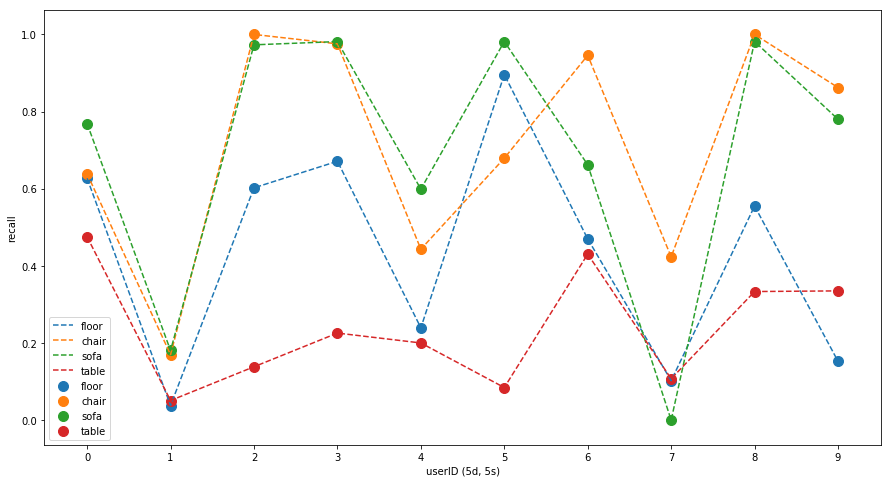

In [142]:
x = range(num_user*2)

plt.figure(figsize=(15,8))
for k in list(recalls.keys()):
    plt.plot(recalls[k], label=k, linestyle='--')
    plt.scatter(x, recalls[k], label=k, marker='o', s=100)
    print('Label: {}, avg(dynamic) {}, avg(static) {}'.format(k, sum(recalls[k][:5])/5, sum(recalls[k][5:])/5))
plt.xticks(x)
plt.xlabel('userID (5d, 5s)')
plt.ylabel('recall')
plt.legend()